In [ ]:
import os
import zipfile

# Define the folder to be zipped
folder_path = '/content/own_data.zip'

# Define the name of the zip file
zip_filename = 'own_data.zip'

# Create the zip file
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, folder_path)
            zipf.write(file_path, arcname)


In [ ]:
# Unzip the uploaded file
import zipfile

with zipfile.ZipFile('own_data.zip', 'r') as zip_ref:
    zip_ref.extractall('destination_folder')


In [ ]:
# Define paths
zip_file_path = '/content/own_data.zip'  # Path to the uploaded zip file in Colab
extracted_dir_path = '/content/extracted/'  # Adjust the target directory in Colab

# Unzip the file
!unzip -q "$zip_file_path" -d "$extracted_dir_path"

print("Extraction completed.")

warning [/content/own_data.zip]:  zipfile is empty
Extraction completed.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import ReduceLROnPlateau

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.00001)


# Define your classes
classes = ['angry', 'disgust', 'fear', 'happy', 'netural', 'sadness', 'surprise']

# Create your own CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load and preprocess images from train and test folders
data = []
labels = []

for emotion_class in classes:
    for folder in ['/content/extracted/own_data/train', '/content/extracted/own_data/test']:
        class_path = os.path.join(folder, emotion_class)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            data.append(img_array)
            labels.append(classes.index(emotion_class))

data = np.array(data)
labels = np.array(labels)

# One-hot encode the labels
labels_one_hot = to_categorical(labels, num_classes=len(classes))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels_one_hot, test_size=0.2, random_state=42)

# Train your own CNN model
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

# Extract features using your own CNN model
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Flatten the extracted features
X_train_flatten = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_flatten = X_test_features.reshape(X_test_features.shape[0], -1)

# Convert one-hot encoded labels back to integer labels
y_train_integer = np.argmax(y_train, axis=1)
y_test_integer = np.argmax(y_test, axis=1)

# Train an SVM classifier on the extracted features
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_flatten, y_train_integer)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test_flatten)

# Calculate accuracy
accuracy = accuracy_score(y_test_integer, predictions)
# print("Accuracy:", accuracy)


Epoch 1/100
17/17 [==============================] - 2s 18ms/step - loss: 10.2932 - accuracy: 0.1236 - val_loss: 1.9632 - val_accuracy: 0.1642
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 1.9536 - accuracy: 0.1779 - val_loss: 1.9411 - val_accuracy: 0.1791
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 1.9479 - accuracy: 0.1835 - val_loss: 1.9210 - val_accuracy: 0.1791
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 1.9218 - accuracy: 0.1835 - val_loss: 1.9237 - val_accuracy: 0.2164
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 1.8651 - accuracy: 0.2191 - val_loss: 1.9012 - val_accuracy: 0.2313
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 1.8506 - accuracy: 0.2210 - val_loss: 1.8932 - val_accuracy: 0.2388
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 1.8657 - accuracy: 0.2341 - val_loss: 1.8741 - val_accuracy: 0.2687
Epoch 8/100

In [ ]:
pip install seaborn matplotlib


Confusion Matrix:
 [[17  8  0  3  3  1  0]
 [ 1 14  0  0  0  2  0]
 [ 2  0  9  2  3  3  1]
 [ 1  0  1 12  0  3  2]
 [ 1  0  6  2 11  1  2]
 [ 4  5  2  1  3 13  1]
 [ 1  0  2  1  0  5 19]]
Classification Report:
               precision    recall  f1-score   support

       angry       0.63      0.53      0.58        32
     disgust       0.52      0.82      0.64        17
        fear       0.45      0.45      0.45        20
       happy       0.57      0.63      0.60        19
     netural       0.55      0.48      0.51        23
     sadness       0.46      0.45      0.46        29
    surprise       0.76      0.68      0.72        28

    accuracy                           0.57       168
   macro avg       0.56      0.58      0.56       168
weighted avg       0.57      0.57      0.56       168

Overall Accuracy: 0.5654761904761905


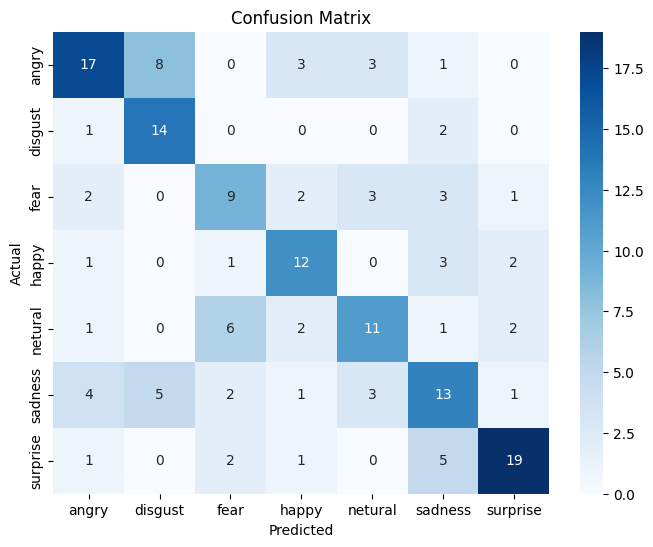

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_integer, predictions)
print("Confusion Matrix:\n", confusion_mat)

# Calculate classification report
class_report = classification_report(y_test_integer, predictions, target_names=classes)
print("Classification Report:\n", class_report)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test_integer, predictions)
print("Overall Accuracy:", overall_accuracy)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


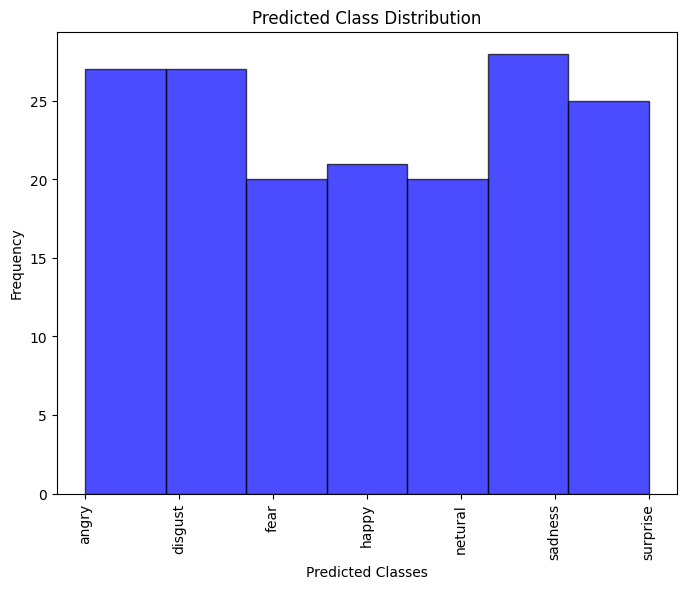

In [ ]:
# Create a histogram of predicted classes
plt.figure(figsize=(8, 6))
plt.hist(predictions, bins=len(classes), alpha=0.7, color='blue', edgecolor='black')
plt.xticks(range(len(classes)), classes, rotation='vertical')
plt.xlabel("Predicted Classes")
plt.ylabel("Frequency")
plt.title("Predicted Class Distribution")
plt.show()
